# Prediction of Car Price

In [67]:
# importing libraries
# Used encoding='latin1' to parse some special characters in the file
import pandas as pd
import seaborn as sns
import numpy as np

In [70]:
cars = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [71]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

# Building an initial model taking into account all the variables

In [72]:
from sklearn.preprocessing import LabelEncoder

# Label encoding two cateogrical columns ['Color, Fuel_Type']
label_en = LabelEncoder()

cars['Color'] = label_en.fit_transform(cars['Color'])
cars['Fuel_Type'] = label_en.fit_transform(cars['Fuel_Type'])

# Dropping Model as it is a categorical column and has no significance in the model
cars.drop('Model', axis=1, inplace=True)
# Dropping 'Cylinders' columns as it is constant '4' throughout the dataset
cars.drop('Cylinders', axis=1, inplace=True)

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                1436 non-null   int64
 1   Price             1436 non-null   int64
 2   Age_08_04         1436 non-null   int64
 3   Mfg_Month         1436 non-null   int64
 4   Mfg_Year          1436 non-null   int64
 5   KM                1436 non-null   int64
 6   Fuel_Type         1436 non-null   int32
 7   HP                1436 non-null   int64
 8   Met_Color         1436 non-null   int64
 9   Color             1436 non-null   int32
 10  Automatic         1436 non-null   int64
 11  cc                1436 non-null   int64
 12  Doors             1436 non-null   int64
 13  Gears             1436 non-null   int64
 14  Quarterly_Tax     1436 non-null   int64
 15  Weight            1436 non-null   int64
 16  Mfr_Guarantee     1436 non-null   int64
 17  BOVAG_Guarantee   1436 non-null  

In [73]:
# Scaling the data through Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cars_scaled_df = pd.DataFrame(scaler.fit_transform(cars), columns = cars.columns)


In [74]:
cars_scaled_df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,-1.730723,0.763763,-1.771966,1.327576,1.541796,-0.574695,-2.337868,-0.768042,0.694219,-0.890258,...,0.850817,0.882853,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
1,-1.728321,0.832715,-1.771966,1.327576,1.541796,0.117454,-2.337868,-0.768042,0.694219,1.461923,...,0.850817,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
2,-1.725919,0.887877,-1.718184,1.029329,1.541796,-0.715386,-2.337868,-0.768042,0.694219,-0.890258,...,-1.175341,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
3,-1.723517,1.163685,-1.610620,0.432833,1.541796,-0.547650,-2.337868,-0.768042,-1.440467,-1.478303,...,-1.175341,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
4,-1.721115,0.832715,-1.395491,-0.760158,1.541796,-0.801028,-2.337868,-0.768042,-1.440467,-1.478303,...,0.850817,0.882853,0.15097,-0.41387,1.700470,-0.654871,0.546235,-0.507388,-0.412716,-0.620293


In [75]:
# Calculating correlation 
# Not readable though

cars_scaled_df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,0.154353,-0.109375,-0.079713,0.003053,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,-0.022157,0.314990,0.108905,-0.051590,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,0.080261,-0.156622,-0.108150,0.029712,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.043774,-0.039312,0.030266,-0.035049,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,-0.072803,0.164697,0.103310,-0.023532,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.420586,-0.333538,-0.080503,0.038198,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
Fuel_Type,0.154353,-0.022157,0.080261,-0.043774,-0.072803,-0.420586,1.000000,0.409476,-0.001859,-0.058285,...,0.040401,0.080161,-0.028092,-0.007220,0.079659,0.043877,0.060458,0.040399,-0.007934,0.027266
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,0.409476,1.000000,0.058712,-0.018910,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,-0.001859,0.058712,1.000000,-0.167835,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Color,0.003053,-0.051590,0.029712,-0.035049,-0.023532,0.038198,-0.058285,-0.018910,-0.167835,1.000000,...,-0.075589,-0.076544,-0.020958,0.063828,-0.134614,-0.084437,-0.124984,-0.095493,0.068035,0.023717


In [76]:
# Calculating VIF through library
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = cars_scaled_df.loc[:, cars_scaled_df.columns != 'Price']

vif = pd.DataFrame()
vif['vif_values'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1]) ] 
vif['features'] = X.columns

vif

C:\Users\Ridaan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif_values,features
0,13.324789,Id
1,inf,Age_08_04
2,inf,Mfg_Month
3,inf,Mfg_Year
4,3.085394,KM
5,4.210381,Fuel_Type
6,1.709799,HP
7,1.175832,Met_Color
8,1.096457,Color
9,1.083557,Automatic


In [77]:
# Dropping those features who have vif more than 10 i.e. id, Radio, Radio_cassette, infinity features as well [Age, Manufacturing Age and Month]

cars_new = cars_scaled_df.drop(['Id', 'Age_08_04', 'Mfg_Month','Mfg_Year','Radio','Radio_cassette'], axis=1)

In [78]:
cars_new.head()

,Price,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Gears,...,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Tow_Bar
0,0.763763,-0.574695,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,0.997419,-1.085139,-0.140425,...,1.547514,-0.529015,0.850817,0.882853,0.15097,-0.588073,-0.654871,0.546235,-0.507388,-0.620293
1,0.832715,0.117454,-2.337868,-0.768042,0.694219,1.461923,-0.242893,0.997419,-1.085139,-0.140425,...,1.547514,1.890304,0.850817,-1.132691,0.15097,-0.588073,-0.654871,0.546235,-0.507388,-0.620293
2,0.887877,-0.715386,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,0.997419,-1.085139,-0.140425,...,1.547514,-0.529015,-1.175341,-1.132691,0.15097,-0.588073,-0.654871,0.546235,-0.507388,-0.620293
3,1.163685,-0.547650,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,0.997419,-1.085139,-0.140425,...,1.547514,-0.529015,-1.175341,-1.132691,0.15097,-0.588073,-0.654871,0.546235,-0.507388,-0.620293
4,0.832715,-0.801028,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,0.997419,-1.085139,-0.140425,...,1.547514,-0.529015,0.850817,0.882853,0.15097,1.700470,-0.654871,0.546235,-0.507388,-0.620293


In [79]:
# Implementing the model using above set of features (30)
import statsmodels.api as sm

y=cars_new.iloc[:,0]
X = cars_new.iloc[:, 1:]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              236.3
Date:                Fri, 02 Jun 2023   Prob (F-statistic):                        0.00
Time:                        14:43:03   Log-Likelihood:                         -766.88
No. Observations:                1436   AIC:                                      1592.
Df Residuals:                    1407   BIC:                                      1745.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
KM                  -0.3264      0.014    -22.780      0.000      -0.354      -0.298
Fuel_Type            0.0949      0.023      4.213      0.000       0.051       0.139
HP                   0.0440      0.014      3.097      0.002       0.016       0.072
Met_Color           -0.0062      0.012     -0.522      0.602      -0.029       0.017
Color               -0.0075      0.011     -0.652      0.514      -0.030       0.015
Automatic           -0.0042      0.011     -0.371      0.710      -0.027       0.018
cc                  -0.0184      0.012     -1.516      0.130      -0.042       0.005
Doors                0.0114      0.013      0.913      0.361      -0.013       0.036
Gears                0.0138      0.012      1.114      0.265      -0.010       0.038
Quarterly_Tax        0.1684      0.024      7.159      0.000       0.122       0.215
Weight               0.2824      0.019     14.600      0.000       0.244       0.320
Mfr_Guarantee        0.0427      0.012      3.544      0.000       0.019       0.066
BOVAG_Guarantee      0.0323      0.013      2.513      0.012       0.007       0.058
Guarantee_Period     0.1392      0.013     10.566      0.000       0.113       0.165
ABS                  0.0644      0.016      4.019      0.000       0.033       0.096
Airbag_1             0.0172      0.014      1.234      0.217      -0.010       0.045
Airbag_2             0.0096      0.019      0.500      0.617      -0.028       0.047
Airco                0.0920      0.015      6.287      0.000       0.063       0.121
Automatic_airco      0.2352      0.014     16.597      0.000       0.207       0.263
Boardcomputer        0.2159      0.015     14.560      0.000       0.187       0.245
CD_Player            0.0886      0.013      6.686      0.000       0.063       0.115
Central_Lock         0.0111      0.024      0.471      0.638      -0.035       0.057
Powered_Windows      0.0691      0.024      2.933      0.003       0.023       0.115
Power_Steering      -0.0110      0.014     -0.800      0.424      -0.038       0.016
Mistlamps           -0.0786      0.016     -5.062      0.000      -0.109      -0.048
Sport_Model          0.0411      0.013      3.093      0.002       0.015       0.067
Backseat_Divider    -0.0453      0.018     -2.531      0.011      -0.080      -0.010
Metallic_Rim         0.0364      0.013      2.864      0.004       0.011       0.061
Tow_Bar             -0.0605      0.012     -5.215      0.000      -0.083      -0.038
==============================================================================
Omnibus:                      116.915   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.406
Skew:                      

## Creating a model dropping some columns based on general understanding

In [92]:
cars_mod = cars_scaled_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight','Price']]
cars_mod.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,0.763763
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,0.832715
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,0.887877
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561,1.163685
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577,0.832715


In [93]:
cars_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age_08_04      1436 non-null   float64
 1   KM             1436 non-null   float64
 2   HP             1436 non-null   float64
 3   cc             1436 non-null   float64
 4   Doors          1436 non-null   float64
 5   Gears          1436 non-null   float64
 6   Quarterly_Tax  1436 non-null   float64
 7   Weight         1436 non-null   float64
 8   Price          1436 non-null   float64
dtypes: float64(9)
memory usage: 101.1 KB


In [94]:
import statsmodels.formula.api as smf

model_new = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=cars_mod).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:52:40   Log-Likelihood:                -606.37
No. Observations:                1436   AIC:                             1231.
Df Residuals:                    1427   BIC:                             1278.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.109e-16      0.010   3.18e-14      1.000      -0.019       0.019
Age_08_04        -0.6239      0.013    -46.512      0.000      -0.650      -0.598
KM               -0.2153      0.013    -16.622      0.000      -0.241      -0.190
HP                0.1309      0.012     11.241      0.000       0.108       0.154
cc               -0.0142      0.011     -1.344      0.179      -0.035       0.007
Doors            -0.0004      0.011     -0.040      0.968      -0.021       0.020
Gears             0.0309      0.010      3.016      0.003       0.011       0.051
Quarterly_Tax     0.0448      0.015      3.015      0.003       0.016       0.074
Weight            0.2461      0.015     15.880      0.000       0.216       0.277
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                         3.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Correlation Matrix and Pair Plot

In [84]:
cars_mod.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


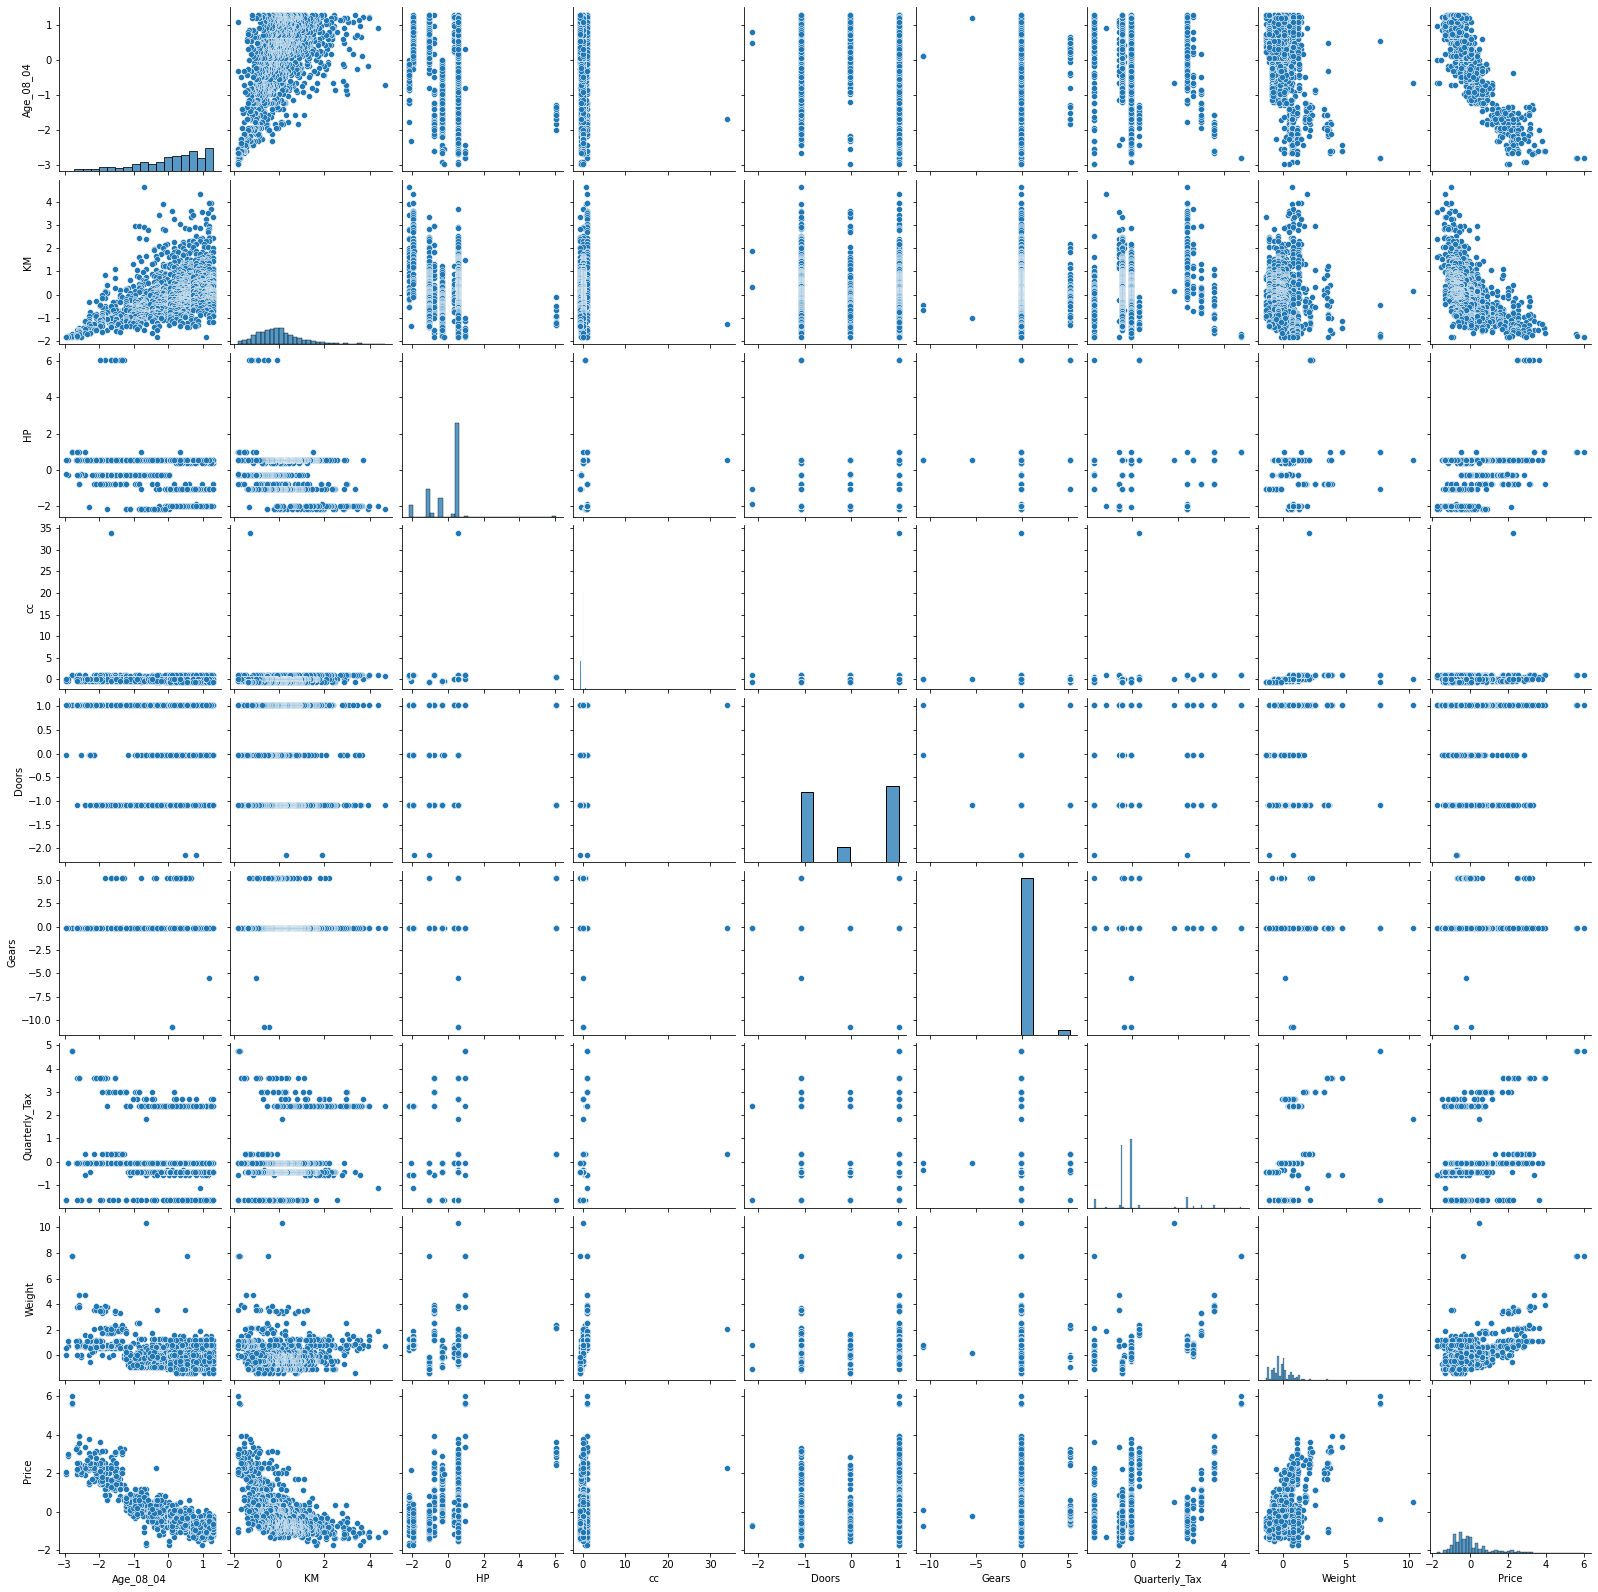

In [96]:
sns.pairplot(cars_mod)

## Calculating VIF through formula for KM (randomly chosen)

In [97]:
rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=cars_mod).fit().rsquared
print(rsq_KM)
vif_KM = 1/1-(rsq_KM)
print(vif_KM)

0.4308171891807997
0.5691828108192003


## Calculating VIF through library

In [98]:
# get X dataframes 

X = cars_mod.loc[:, cars_mod.columns != 'Price']
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577


# Step 2: Calculate VIF

In [99]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Step 3: Inspecting VIF

In [100]:
# roundinf ogg vif values
vif.round(2)


,VIF Factor,features
0,1.88,Age_08_04
1,1.76,KM
2,1.42,HP
3,1.16,cc
4,1.16,Doors
5,1.10,Gears
6,2.31,Quarterly_Tax
7,2.52,Weight


## Hence, VIF of any variable is not more than 10, there is no strong collinearity and we need not to drop any variable fom our model.

## But I am not clear and wanted to ask why vif of KM is coming different through formula (0.57) and from matrix (1.76)